In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import seaborn as sns

In [15]:
column_names = ['user_id','item_id','rating','timestamp']

In [16]:
df = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/23. Recommender Systems/19-Recommender-Systems/u.data',sep='\t',names=column_names)

In [17]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [18]:
movie_titles = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/23. Recommender Systems/19-Recommender-Systems/Movie_Id_Titles')

In [19]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [20]:
df = pd.merge(df,movie_titles,on='item_id')

In [21]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [22]:
byRatings = df[['title','rating']].groupby('title',as_index=False).mean().sort_values(by='rating',ascending=False)

In [23]:
byRatings

,title,rating
1472,They Made Me a Criminal (1939),5.0
944,Marlene Dietrich: Shadow and Light (1996),5.0
1273,"Saint of Fort Washington, The (1993)",5.0
1359,Someone Else's America (1995),5.0
1387,Star Kid (1997),5.0
...,...,...
483,"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
818,King of New York (1990),1.0
1522,Touki Bouki (Journey of the Hyena) (1973),1.0
192,"Bloody Child, The (1996)",1.0


In [24]:
byCount = df[['title','rating']].groupby('title',as_index=False).count().sort_values(by='rating',ascending=False)

In [25]:
byCount

,title,rating
1398,Star Wars (1977),584
333,Contact (1997),509
498,Fargo (1996),508
1234,Return of the Jedi (1983),507
860,Liar Liar (1997),485
...,...,...
633,"Great Day in Harlem, A (1994)",1
1111,"Other Voices, Other Rooms (1997)",1
620,Good Morning (1971),1
606,Girls Town (1996),1


In [26]:
ratings = pd.DataFrame(df[['title','rating']].groupby('title').mean())

In [27]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['no_of_ratings'] = pd.DataFrame(df.groupby('title')['title'].count())

In [29]:
ratings.tail()

,rating,no_of_ratings
title,,
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6
unknown,3.444444,9
Á köldum klaka (Cold Fever) (1994),3.000000,1


<AxesSubplot:xlabel='no_of_ratings', ylabel='Count'>

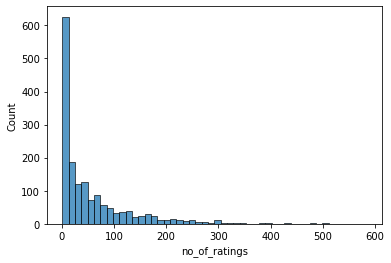

In [105]:
sns.histplot(ratings['no_of_ratings'])

<AxesSubplot:xlabel='rating', ylabel='Count'>

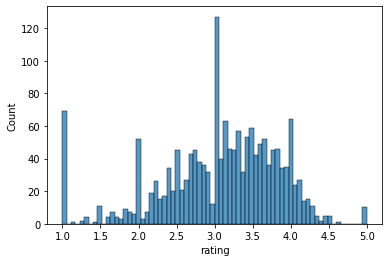

In [30]:
sns.histplot(ratings['rating'],bins=70)

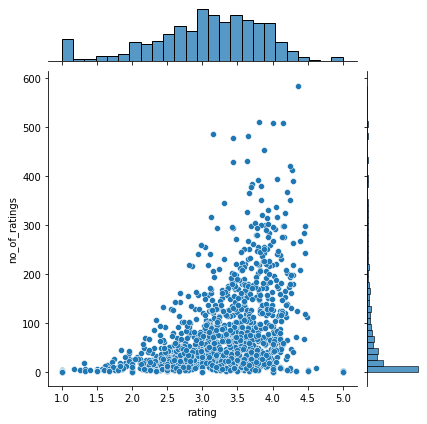

In [31]:
sns.jointplot(x='rating',y='no_of_ratings',data=ratings)

In [170]:
moviemat = df.pivot_table(index='user_id',values='rating',columns='title')

In [34]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
star_wars_ratings = moviemat['Star Wars (1977)']
dalmatians = moviemat['101 Dalmatians (1996)']
similar_to_star_wars = moviemat.corrwith(star_wars_ratings)
similar_to_dalmatians = moviemat.corrwith(dalmatians)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [36]:
similar_to_star_wars.sort_values(ascending=False)

title
Hollow Reed (1996)                         1.0
Stripes (1981)                             1.0
Star Wars (1977)                           1.0
Man of the Year (1995)                     1.0
Beans of Egypt, Maine, The (1994)          1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

In [37]:
similar_to_dalmatians.sort_values(ascending=False)

title
Hard Rain (1998)                          1.0
In the Line of Duty 2 (1987)              1.0
Frisk (1995)                              1.0
101 Dalmatians (1996)                     1.0
Grateful Dead (1995)                      1.0
                                         ... 
World of Apu, The (Apur Sansar) (1959)    NaN
Yankee Zulu (1994)                        NaN
You So Crazy (1994)                       NaN
unknown                                   NaN
Á köldum klaka (Cold Fever) (1994)        NaN
Length: 1664, dtype: float64

In [38]:
corr_star_wars = pd.DataFrame(data=similar_to_star_wars,columns=['Correlation'])

In [39]:
corr_star_wars = corr_star_wars.join(ratings['no_of_ratings'])

In [40]:
corr_star_wars_true = corr_star_wars[corr_star_wars['no_of_ratings']>100]

In [41]:
corr_star_wars_true.sort_values(by='Correlation',ascending=False)

,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [42]:
corr_dalmatians = pd.DataFrame(data=similar_to_dalmatians,columns=['Correlation'])
corr_dalmatians = corr_dalmatians.join(ratings['no_of_ratings'])
corr_dalmatians_true = corr_dalmatians[corr_dalmatians['no_of_ratings']>100]
corr_dalmatians_true.sort_values(by='Correlation',ascending=False)

,Correlation,no_of_ratings
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150
...,...,...
Ulee's Gold (1997),-0.398240,184
Shine (1996),-0.413509,129
Cop Land (1997),-0.447214,175


In [120]:
my_ratings = moviemat.iloc[1].dropna()
my_ratings

title
101 Dalmatians (1996)                  2.0
12 Angry Men (1957)                    5.0
20,000 Leagues Under the Sea (1954)    3.0
2001: A Space Odyssey (1968)           4.0
Abyss, The (1989)                      3.0
                                      ... 
Wizard of Oz, The (1939)               4.0
Wrong Trousers, The (1993)             5.0
Young Frankenstein (1974)              5.0
Young Guns (1988)                      3.0
unknown                                4.0
Name: 1, Length: 271, dtype: float64

In [221]:
#reco_cand = pd.DataFrame()
corr_mat = moviemat.corr(method='pearson', min_periods=100)
index = [i for i in range(0,10)]
for i in range(0,len(index)):
    my_ratings = moviemat.iloc[i].dropna()
    candidate = pd.DataFrame(corr_mat[my_ratings.index[i]].dropna().values,columns=['Score'],index=corr_mat[my_ratings.index[i]].dropna().index)
    candidate['Score'] = candidate['Score'].map(lambda x: x * my_ratings[i])
    candidate = candidate.groupby(candidate.index).sum()
    sort = candidate.sort_values(by='Score',ascending=False,inplace=False)
    sorts = candidate[df[candidate]!=my_ratings.index]
    #candidate = candidates.drop(my_ratings)
    print('Recommendations for User',index[i],sep=': ')
    print(sorts.head(10))
    print('\n')
    
#     candidate = candidate.drop(my_ratings.index)
        
        #corr_matrix[my_ratings.index[i]]

ValueError: Unable to coerce to Series, length must be 5: given 3

In [165]:
recommendation_candidates = pd.Series()
corr_matrix = moviemat.corr(method='pearson', min_periods=100)
index = [i for i in range(0,10)]
for i in range(0,len(index)):
    #recommendation_candidates = pd.Series()
    my_ratings = moviemat.iloc[i].dropna()
    candidate = corr_matrix[my_ratings.index[i]].dropna()
    candidate = candidate.map(lambda x: x * my_ratings[i])
    recommendation_candidates = recommendation_candidates.append(candidate)
    recommendation_candidates = recommendation_candidates.groupby(recommendation_candidates.index).sum()
    recommendation_candidates.sort_values(inplace=True, ascending=False)
    #sorted_candidates = recommendation_candidates.drop(labels=my_ratings.index)
    print('Recommendations for User',index[i],sep=': ')
    print('\n')
    #print(sorted_candidates.head(10))
    print(recommendation_candidates.head(10))
    print(recommendation_candidates.info())
    print('='*40)
    print('\n')

    #sorted_candidates.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  recommendation_candidates = pd.Series()
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendation_candidates = recommendation_candidates.append(candidate)
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendation_candidates = recommendation_candidates.append(candidate)
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Recommendations for User: 0


Empire Strikes Back, The (1980)         5.000000
Star Wars (1977)                        3.741763
Return of the Jedi (1983)               3.606146
Raiders of the Lost Ark (1981)          2.693297
Bridge on the River Kwai, The (1957)    1.783717
Cinderella (1950)                       1.749598
Back to the Future (1985)               1.726427
Terminator 2: Judgment Day (1991)       1.667662
Field of Dreams (1989)                  1.642076
Chasing Amy (1997)                      1.633938
dtype: float64
<class 'pandas.core.series.Series'>
Index: 197 entries, Empire Strikes Back, The (1980) to Piano, The (1993)
Series name: None
Non-Null Count  Dtype  
--------------  -----  
197 non-null    float64
dtypes: float64(1)
memory usage: 3.1+ KB
None


Recommendations for User: 1


12 Angry Men (1957)                     5.000000
Empire Strikes Back, The (1980)         5.000000
Star Wars (1977)                        4.663210
Return of the Jedi (1983)               3

C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendation_candidates = recommendation_candidates.append(candidate)
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendation_candidates = recommendation_candidates.append(candidate)
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendation_candidates = recommendation_candidates.append(candidate)
C:\Users\user\AppData\Local\Temp\ipykernel_10332\85255814.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.co